In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/CAR DETAILS.csv')

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.shape

(4340, 8)

In [ ]:
df.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object


In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
df.duplicated().sum()

763

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['year'].value_counts()

,count
year,
2017,346
2012,338
2015,332
2014,321
2013,298
2018,295
2016,283
2011,247
2010,210


In [ ]:
df['year'].nunique()

27

In [ ]:
df['year'].unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992])

In [ ]:
df['km_driven'].value_counts()

,count
km_driven,
70000,210
80000,199
120000,199
60000,194
50000,181
...,...
35925,1
40771,1
30500,1


In [ ]:
df['km_driven'].nunique()

770

In [ ]:
df['fuel'].value_counts()

,count
fuel,
Diesel,1800
Petrol,1717
CNG,37
LPG,22
Electric,1


In [ ]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,2832
Dealer,712
Trustmark Dealer,33


In [ ]:
df['transmission'].value_counts()

,count
transmission,
Manual,3265
Automatic,312


In [ ]:
df['owner'].value_counts()

,count
owner,
First Owner,2218
Second Owner,978
Third Owner,289
Fourth & Above Owner,75
Test Drive Car,17


In [ ]:
df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


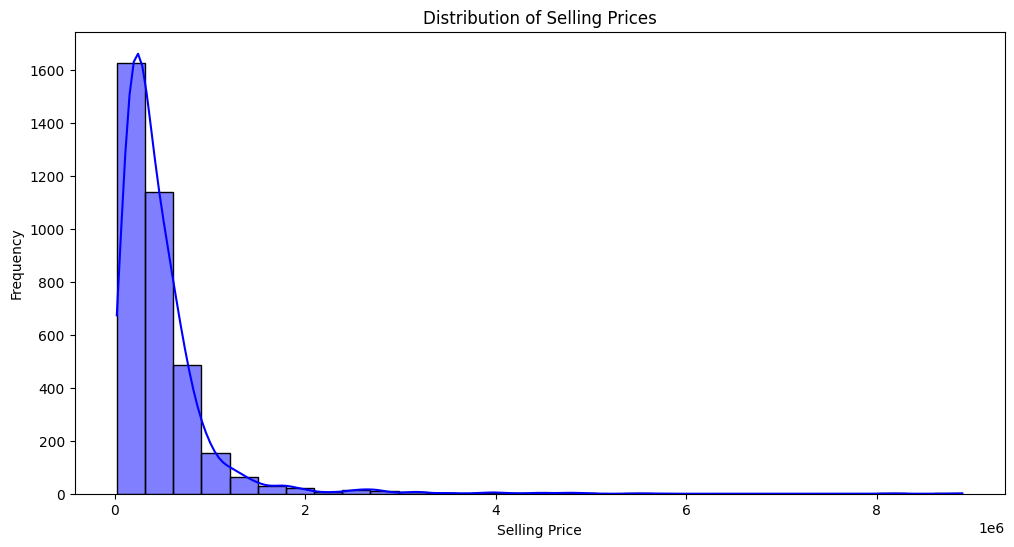

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['selling_price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

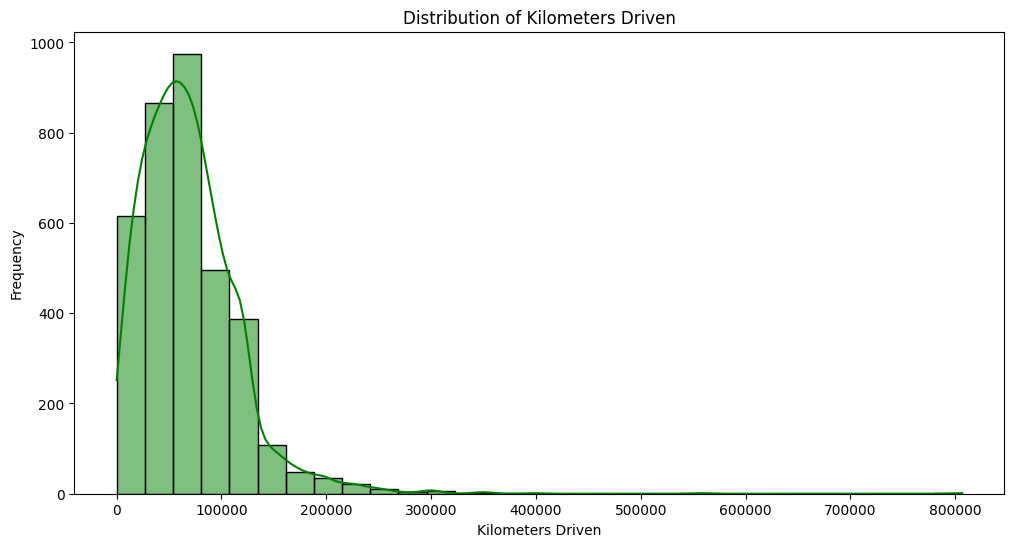

In [ ]:
    plt.figure(figsize=(12, 6))
    sns.histplot(df['km_driven'], kde=True, bins=30, color='green')
    plt.title('Distribution of Kilometers Driven')
    plt.xlabel('Kilometers Driven')
    plt.ylabel('Frequency')
    plt.show()

<ipython-input-179-c2cd813f18a8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fuel', palette='Set2')


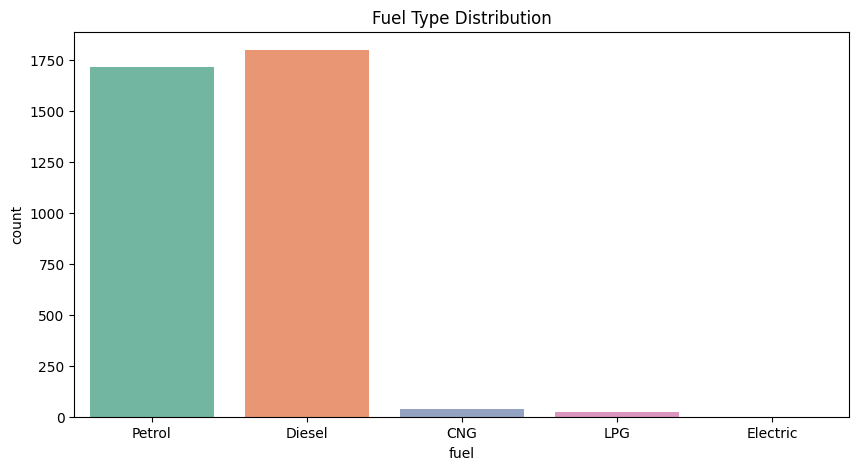

In [ ]:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='fuel', palette='Set2')
    plt.title('Fuel Type Distribution')
    plt.show()

<ipython-input-180-3a0e9816bc15>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='transmission', palette='Set3')


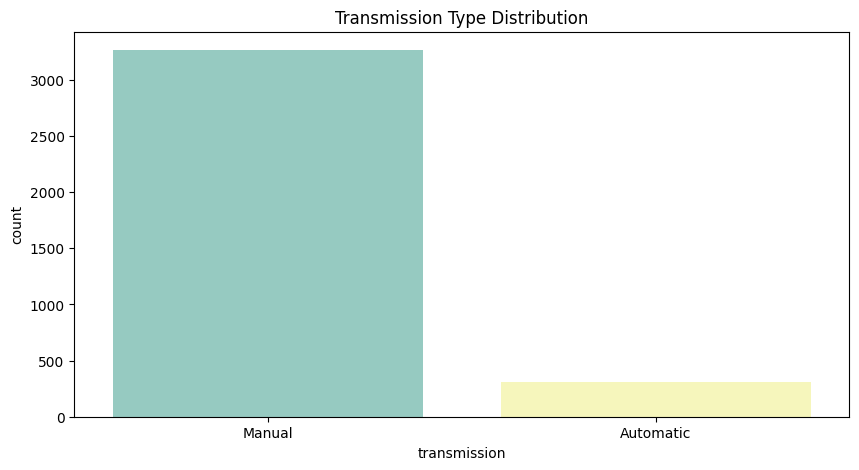

In [ ]:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='transmission', palette='Set3')
    plt.title('Transmission Type Distribution')
    plt.show()

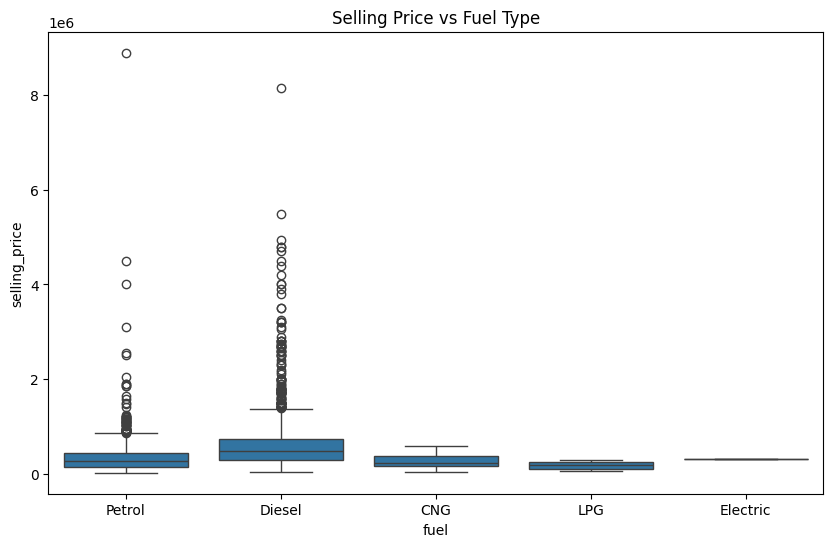

In [ ]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='fuel', y='selling_price', data=df)
    plt.title('Selling Price vs Fuel Type')
    plt.show()

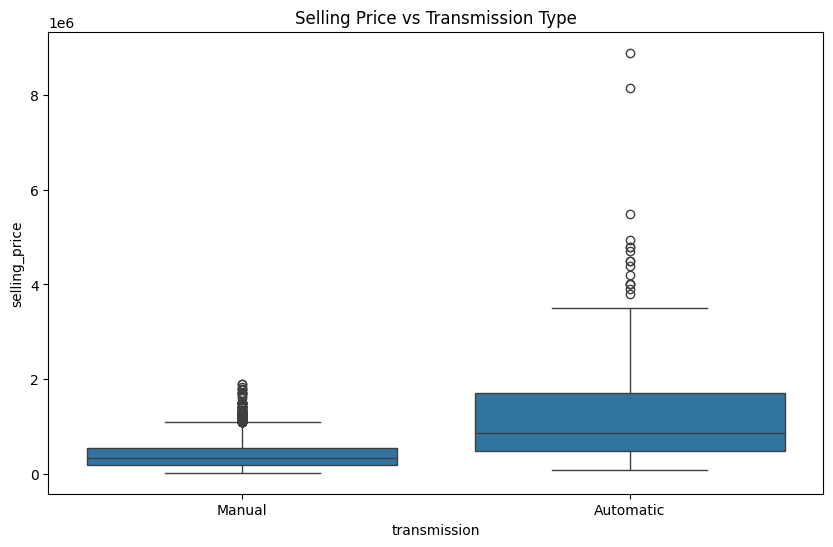

In [ ]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='transmission', y='selling_price', data=df)
    plt.title('Selling Price vs Transmission Type')
    plt.show()

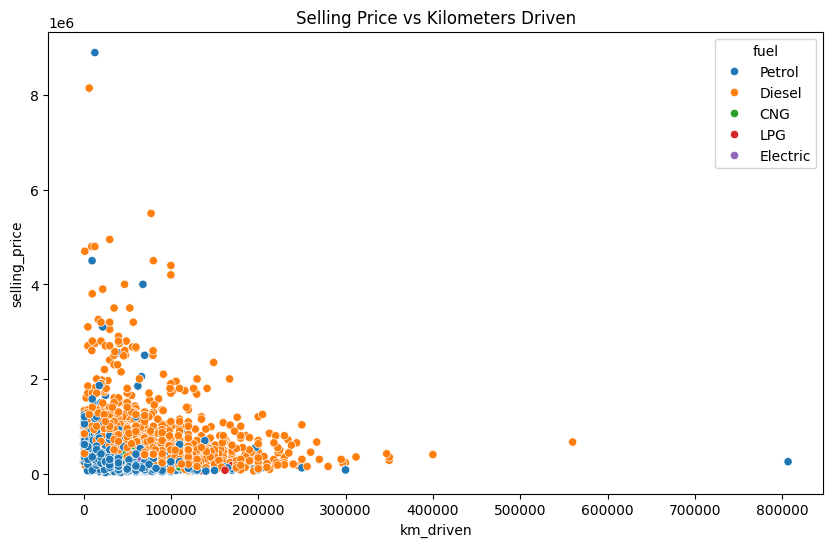

In [ ]:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='km_driven', y='selling_price', hue='fuel', data=df)
    plt.title('Selling Price vs Kilometers Driven')
    plt.show()

In [ ]:
df.drop('name', axis=1, inplace=True)

In [ ]:
# 1. Identify the categorical columns to apply one-hot encoding
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']

# 2. Apply one-hot encoding using pandas `get_dummies()`
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded = df_encoded.astype(int)
# 3. Display the first few rows of the encoded dataframe
df_encoded.head()


,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,1,1,0,1,0,0,0,0
1,2007,135000,50000,0,0,0,1,1,0,1,0,0,0,0
2,2012,600000,100000,1,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000,0,0,0,1,1,0,1,0,0,0,0
4,2014,450000,141000,1,0,0,0,1,0,1,0,1,0,0


In [ ]:
df_encoded.dtypes

,0
year,int64
selling_price,int64
km_driven,int64
fuel_Diesel,int64
fuel_Electric,int64
fuel_LPG,int64
fuel_Petrol,int64
seller_type_Individual,int64
seller_type_Trustmark Dealer,int64
transmission_Manual,int64


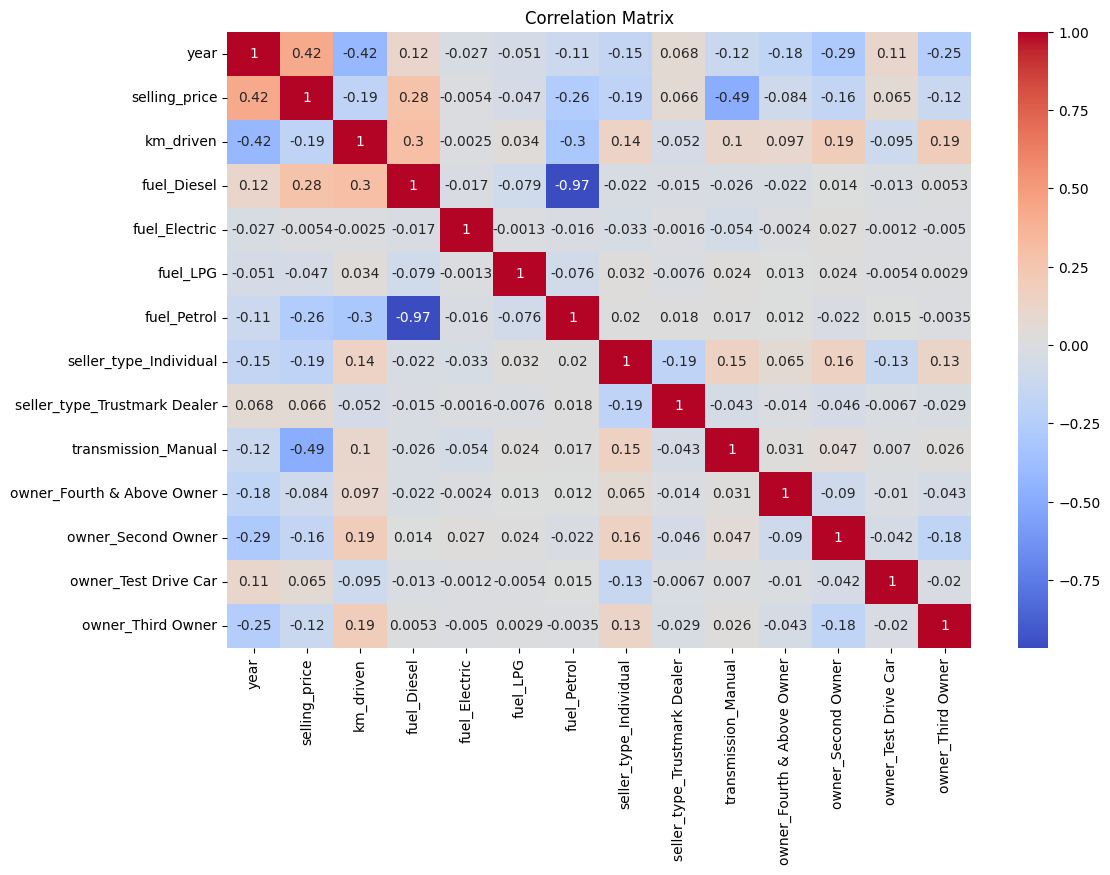

In [ ]:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_encoded)

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)

In [ ]:
df_scaled.head()

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.535714,0.004505,0.086783,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.535714,0.012950,0.061988,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.714286,0.065315,0.123976,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.892857,0.025901,0.057028,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.785714,0.048423,0.174807,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
x = df_scaled.drop('selling_price', axis=1)
y = df_scaled['selling_price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2861, 13), (716, 13), (2861,), (716,))

In [ ]:
x_train.head()

,year,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
2011,0.785714,0.167368,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1108,0.892857,0.024794,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
838,0.535714,0.074385,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3382,0.785714,0.079344,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
871,0.928571,0.084303,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def reg_eval_metrics(y, ypred):
    mae = mean_absolute_error(y, ypred)
    mse = mean_squared_error(y, ypred)
    rmse = np.sqrt(mean_squared_error(y, ypred))
    r2 = r2_score(y, ypred)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)

def train_test_scr(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
ypred_lr = lr.predict(x_test)

In [ ]:
train_test_scr(lr)

Training Score 0.4489368370998965
Testing Score 0.39269348342683597


In [ ]:
reg_eval_metrics(y_test, ypred_lr)

MAE: 0.023994501871185486
MSE: 0.002480948246291543
RMSE: 0.049809118103932966
R2 Score: 0.39269348342683597


In [ ]:
l1 = Lasso()
l1.fit(x_train, y_train)

Lasso()

In [ ]:
ypred_l1 = l1.predict(x_test)

In [ ]:
train_test_scr(l1)

Training Score 0.0
Testing Score -0.00036342876473560715


In [ ]:
reg_eval_metrics(y_test, ypred_l1)

MAE: 0.03402372401636785
MSE: 0.00408665118275422
RMSE: 0.06392692064188779
R2 Score: -0.00036342876473560715


In [ ]:
l2 = Ridge()
l2.fit(x_train, y_train)

Ridge()

In [ ]:
ypred_l2 = l2.predict(x_test)

In [ ]:
train_test_scr(l2)

Training Score 0.44887669849176637
Testing Score 0.3921243211291491


In [ ]:
reg_eval_metrics(y_test, ypred_l2)

MAE: 0.0239683757336277
MSE: 0.0024832733690520717
RMSE: 0.04983245297044961
R2 Score: 0.3921243211291491


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import StackingRegressor

In [ ]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
ypred_knn = knn.predict(x_test)

In [ ]:
train_test_scr(knn)

Training Score 0.6393045312844938
Testing Score 0.41803013603665073


In [ ]:
reg_eval_metrics(y_test, ypred_knn)

MAE: 0.022628845374704314
MSE: 0.0023774438014291517
RMSE: 0.04875903815118948
R2 Score: 0.41803013603665073


In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
ypred_dt = dt.predict(x_test)

In [ ]:
train_test_scr(dt)

Training Score 0.9487745091932563
Testing Score 0.13884379036004424


In [ ]:
reg_eval_metrics(y_test, ypred_dt)

MAE: 0.02620874355799766
MSE: 0.0035179665124372692
RMSE: 0.059312448208089244
R2 Score: 0.13884379036004424


In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
ypred_rf = rf.predict(x_test)

In [ ]:
train_test_scr(rf)

Training Score 0.8766027815538492
Testing Score 0.44003406603972817


In [ ]:
reg_eval_metrics(y_test, ypred_rf)

MAE: 0.021779082284756897
MSE: 0.002287554083366032
RMSE: 0.04782838156749643
R2 Score: 0.44003406603972817


In [ ]:
bag = BaggingRegressor()
bag.fit(x_train, y_train)

BaggingRegressor()

In [ ]:
ypred_bag = bag.predict(x_test)

In [ ]:
train_test_scr(bag)

Training Score 0.8579154601034567
Testing Score 0.384030229329126


In [ ]:
reg_eval_metrics(y_test, ypred_bag)

MAE: 0.022918026473041215
MSE: 0.0025163390818488
RMSE: 0.050163124721739574
R2 Score: 0.384030229329126


In [ ]:
import pickle

In [ ]:
pickle.dump(lr, open('lr_model.pkl', 'wb'))

In [ ]:
loaded_model = pickle.load(open('lr_model.pkl', 'rb'))

In [ ]:
df1 = df.sample(n=20,random_state=7)

In [ ]:
df1_x = df1.drop('selling_price', axis=1)
df1_y = df1['selling_price']
df1_x.shape, df1_y.shape

((20, 6), (20,))

In [ ]:
# 1. Identify the categorical columns to apply one-hot encoding
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']

# 2. Apply one-hot encoding using pandas `get_dummies()`
df1_x_encoded = pd.get_dummies(df1_x, columns=categorical_columns, drop_first=True)
df1_x_encoded = df1_x_encoded.astype(int)
# 3. Display the first few rows of the encoded dataframe
df1_x_encoded.head()
df1_x_encoded.shape

(20, 10)

In [ ]:
df1_x_scaled = scaler.fit_transform(df1_x_encoded)

In [ ]:
df1_x_scaled = pd.DataFrame(df1_x_scaled, columns=df1_x_encoded.columns)

In [ ]:
df1_x_scaled.head()


,year,km_driven,fuel_Diesel,fuel_Electric,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner
0,0.076923,0.585554,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.692308,0.279088,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.384615,0.467140,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,0.923077,0.200710,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.692308,0.358733,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(df1_x_scaled, df1_y, test_size=0.2, random_state=42)

In [ ]:
x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape

((16, 10), (4, 10), (16,), (4,))

In [ ]:
x1_train.head()

,year,km_driven,fuel_Diesel,fuel_Electric,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner
8,0.230769,0.369449,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.000000,0.141504,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
11,0.538462,0.517306,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.923077,0.200710,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
18,0.230769,0.585554,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
x1_test.head()

,year,km_driven,fuel_Diesel,fuel_Electric,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner
0,0.076923,0.585554,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
17,1.000000,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
15,0.923077,0.000213,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.692308,0.279088,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
